<a href="https://colab.research.google.com/github/paulanavarretec/WineRec/blob/master/WineRec_Baselines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
!pip install pyreclab
import pyreclab
from matplotlib import pyplot as plt

#itemKnn

In [0]:
itemKnn = pyreclab.ItemKnn(dataset='train_70.csv',
                           dlmchar=b',',
                           header=True,
                           usercol=0,
                           itemcol=1,
                           ratingcol=13)

N = [2,3,4,5,6,7,8,9,10,15]
predlist = []
mae = []
rmse = []

for n in N:
  itemKnn.train(n, 'pearson')
  predlist_, mae_, rmse_ = itemKnn.test(input_file='train_30.csv',
                                     dlmchar=b',',
                                     header=True,
                                     usercol=0,
                                     itemcol=1,
                                     ratingcol=13,
                                     output_file=('predictionsitemKnn'+str(n)+'.csv'))
  predlist.append(predlist_)
  mae.append(mae_)
  rmse.append(rmse_)
  
min_mae_iknn = min(mae)
min_rmse_iknn = min(rmse)

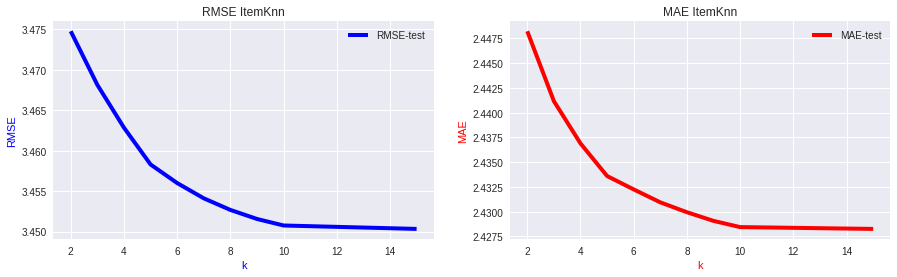

In [24]:
fig, axes = plt.subplots(ncols=2, figsize=(15, 4))

with plt.style.context('fivethirtyeight'):
    
    axes[0].plot(N, rmse, label='RMSE-test', color='b')    
    axes[1].plot(N, mae, label='MAE-test', color='r')
    
    
axes[0].set_ylabel('RMSE', color='b')
axes[1].set_ylabel('MAE', color='r')

axes[0].set_xlabel('k', color='b')
axes[1].set_xlabel('k', color='r')

axes[0].set_title('RMSE ItemKnn')
axes[1].set_title('MAE ItemKnn')

axes[0].legend()
axes[1].legend()

fig.savefig('RMSE_MAE_ItemKnn.png')


# UserKnn

In [0]:
userKnn = pyreclab.UserKnn(dataset='train_70.csv',
                             dlmchar=b',',
                             header=True,
                             usercol=0,
                             itemcol=1,
                             ratingcol=13)
N = [2,3,4,5,6,7,8,9,10,15]
predlist = []
mae = []
rmse = []

for n in N:
  userKnn.train(n, 'pearson')
  predlist_, mae_, rmse_ = userKnn.test(input_file='train_30.csv',
                                     dlmchar=b',',
                                     header=True,
                                     usercol=0,
                                     itemcol=1,
                                     ratingcol=13,
                                     output_file=('predictionsUserKnn'+str(n)+'.csv'))
  predlist.append(predlist_)
  mae.append(mae_)
  rmse.append(rmse_)
  
min_mae_uknn = min(mae)
min_rmse_uknn = min(rmse)

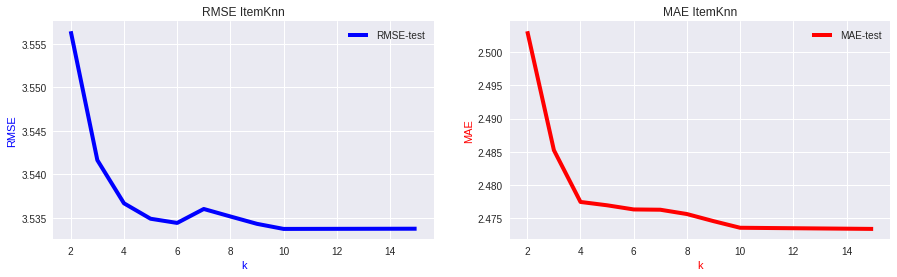

In [26]:
fig, axes = plt.subplots(ncols=2, figsize=(15, 4))

with plt.style.context('fivethirtyeight'):
    
    axes[0].plot(N, rmse, label='RMSE-test', color='b')    
    axes[1].plot(N, mae, label='MAE-test', color='r')
    
    
axes[0].set_ylabel('RMSE', color='b')
axes[1].set_ylabel('MAE', color='r')

axes[0].set_xlabel('k', color='b')
axes[1].set_xlabel('k', color='r')

axes[0].set_title('RMSE ItemKnn')
axes[1].set_title('MAE ItemKnn')

axes[0].legend()
axes[1].legend()

fig.savefig('RMSE_MAE_ItemKnn.png')


# SlopeOne

In [32]:
SlopeOne = pyreclab.SlopeOne(dataset='train_70.csv',
                              dlmchar=b',',
                              header=True,
                              usercol=0,
                              itemcol=1,
                              ratingcol=13)
SlopeOne.train()

predlist_, mae_, rmse_ = SlopeOne.test(input_file='train_30.csv',
                                    dlmchar=b',',
                                    header=True,
                                    usercol=0,
                                    itemcol=1,
                                    ratingcol=13,
                                    output_file='predictionsSlopeOne.csv')
print('MAE =',mae_)
print('RMSE =',rmse_)

min_mae_slope1 = mae_
min_rmse_slope1 = rmse_

('MAE =', 40.16050260898455)
('RMSE =', 56.73106747102234)


# SVD

In [0]:
SVD = pyreclab.SVD(dataset='train_70.csv',
                   dlmchar=b',',
                   header=True,
                   usercol=0,
                   itemcol=1,
                   ratingcol=13)

predlist = []
mae = []
rmse = []

factors = [10, 100, 1000]
maxiter = [100,200]

for i in maxiter:
  
  predlist_iter = []
  mae_iter = []
  rmse_iter = []
  for f in factors:
    
    SVD.train(factors=f, maxiter=i, lr=0.01, lamb=0.1)
    predlist_, mae_, rmse_ = SVD.test(input_file='train_30.csv',
                                        dlmchar=b',',
                                        header=True,
                                        usercol=0,
                                        itemcol=1,
                                        ratingcol=13,
                                        output_file=('predictionsSVD_'+str(f)+'_'+str(i)+'.csv'))

    predlist_iter.append(predlist_)
    mae_iter.append(mae_)
    rmse_iter.append(rmse_)
    
  predlist.append(predlist_iter)
  mae.append(mae_iter)
  rmse.append(rmse_iter)
  
import numpy as np
  
mae = np.append(mae[0],mae[1])
rmse = np.append(rmse[0],rmse[1])

min_mae_svd = min(mae)
min_rmse_svd = min(rmse)

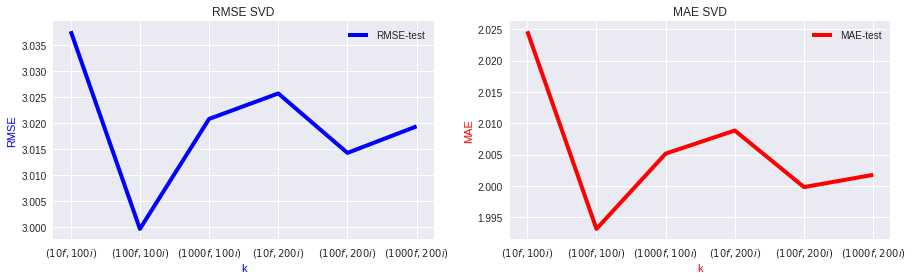

In [34]:
fig, axes = plt.subplots(ncols=2, figsize=(15, 4))

l = [1,2,3,4,5,6]
ticks = ['','$(10f,100i)$', '$(100f,100i)$', '$(1000f,100i)$','$(10f,200i)$', '$(100f,200i)$', '$(1000f,200i)$']

with plt.style.context('fivethirtyeight'):
    
    axes[0].plot(l, rmse, label='RMSE-test', color='b')    
    axes[1].plot(l, mae, label='MAE-test', color='r')
    
    
axes[0].set_ylabel('RMSE', color='b')
axes[1].set_ylabel('MAE', color='r')

axes[0].set_xlabel('k', color='b')
axes[1].set_xlabel('k', color='r')

axes[0].set_xticklabels(ticks)
axes[1].set_xticklabels(ticks)

axes[0].set_title('RMSE SVD')
axes[1].set_title('MAE SVD')

axes[0].legend()
axes[1].legend()


fig.savefig('RMSE_MAE_SVD.png')


In [41]:
print('min_mae_iknn:',min_mae_iknn)
print('min_rmse_iknn:',min_rmse_iknn)

print('min_mae_uknn:',min_mae_uknn)
print('min_rmse_uknn:',min_rmse_uknn)

print('min_mae_slope:',min_mae_slope1)
print('min_rmse_slope:',min_rmse_slope1)

print('min_mae_svd:',min_mae_svd)
print('min_rmse_svd:',min_rmse_svd)

('min_mae_iknn:', 2.428258749734267)
('min_rmse_iknn:', 3.45033033685164)
('min_mae_uknn:', 2.473369125596998)
('min_rmse_uknn:', 3.5337156667013683)
('min_mae_slope:', 40.16050260898455)
('min_rmse_slope:', 56.73106747102234)
('min_mae_svd:', 1.993128259070019)
('min_rmse_svd:', 2.999657717523185)
